Review cleaned dataset and identify interest area
- strong relationships been identify (correlation >= 0.50) as interest area
- visualize using heatmap and histogram
- identify columns that are frequently shown in the high correlation group

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

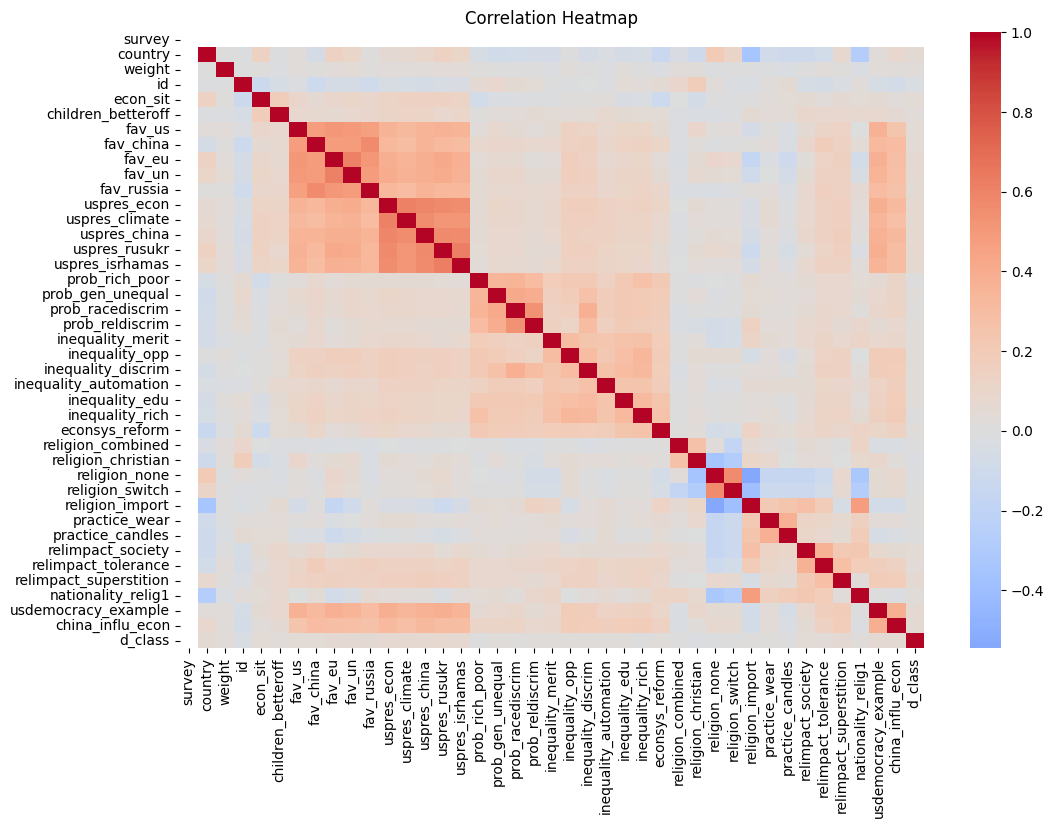

In [2]:
corr = pd.read_excel('corr.xlsx', index_col=0)

plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm", center=0, annot=False)

plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# mask upper triangle, keep only 1 set of correlations for each pair
mask = np.triu(np.ones(corr.shape), k=1).astype(bool)
# turn into long form, drop the nan from mask
corr_unstacked = corr.where(mask).stack()
sorted_corr = corr_unstacked.reindex(corr_unstacked.abs().sort_values(ascending=False).index)
sorted_corr.to_excel('sorted_corr.xlsx')
print("Highest correlations:\n", sorted_corr.head(10))

Highest correlations:
 uspres_rusukr   uspres_isrhamas    0.616922
fav_eu          fav_un             0.613243
uspres_econ     uspres_climate     0.607703
                uspres_china       0.584019
uspres_china    uspres_rusukr      0.575110
uspres_econ     uspres_rusukr      0.574244
fav_china       fav_russia         0.570125
religion_none   religion_switch    0.561863
uspres_china    uspres_isrhamas    0.561475
uspres_climate  uspres_china       0.554432
dtype: float64


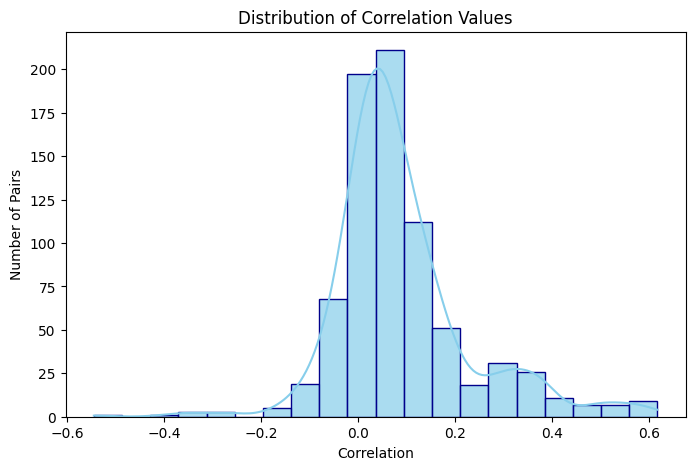

Mean: 0.08848
Median: 0.05822


In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(sorted_corr, bins=20, kde=True, color='skyblue', edgecolor='darkblue', alpha=0.7)
plt.title("Distribution of Correlation Values")
plt.xlabel("Correlation")
plt.ylabel("Number of Pairs")
plt.show()

print("Mean:", round(sorted_corr.mean(),5))
print("Median:", round(sorted_corr.median(),5))
# print("Mode(s):", sorted_corr.mode()) # return multiple values due to tied values

Initial takeaway:
- identified 10 pairs of column relationship that have the highest correlation
- overall columns relationships is bimodal distribution, with 1 major peak around 0–0.05, and 1 minor peak around 0.25–0.3
- major peak is right-skewed (positively skewed) as mean > median
- most correlations are weak (between -0.2 to 0.2)
- histogram provides insight that a small subset of data, coorelations that are >= 0.50 or <= -0.50
- there are more positive correlations than negative correlations

In [ ]:
# excel = os.getcwd() + '\\Data\\' + 'Pew Research Center Global Attitudes Spring 2024 Data Dictionary.xlsx'
# df_excel = pd.read_excel(excel)
# df_excel

,Variable Information,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Variable,Position,Label,Measurement Level,Role,Column Width,Alignment,Print Format,Write Format
1,survey,1,Survey,Scale,Input,10,Right,F8.2,F8.2
2,country,2,Country,Nominal,Input,10,Right,F8.2,F8.2
3,weight,3,Weight,Scale,Input,10,Right,F8.2,F8.2
4,id,4,Respondent ID,Scale,Input,10,Right,F8.2,F8.2
...,...,...,...,...,...,...,...,...,...
649,urbanicity,649,Urbanicity (in face-to-face countries only),Nominal,Input,12,Right,F8.2,F8.2
650,popsize_chile,650,Population size - Chile,Nominal,Input,15,Right,F8.2,F8.2
651,qdate_s,651,START date of interview (DD/MM/YYYY):,Scale,Input,10,Right,EDATE10,EDATE10
652,qdate_e,652,END date of interview (DD/MM/YYYY):,Scale,Input,10,Right,EDATE10,EDATE10


In [ ]:
# df = pd.read_csv("variables_flat.csv")
# # what are the survey questions
# df['var_label'].unique()

,var_id,var_name,var_label,cat_value,cat_label
0,e5f2bd10-1790-4d82-887f-ef30849f66b6,survey,Survey,1202401,"Spring, 2024"
1,_8d2b8de8-1d97-4b71-9c8f-674ccec9cf2e,country,Country,2,Canada
2,_8d2b8de8-1d97-4b71-9c8f-674ccec9cf2e,country,Country,3,France
3,_8d2b8de8-1d97-4b71-9c8f-674ccec9cf2e,country,Country,4,Germany
4,_8d2b8de8-1d97-4b71-9c8f-674ccec9cf2e,country,Country,5,Greece
...,...,...,...,...,...
5301,_20c18e27-ee7c-4289-bc95-c722e655cd4b,popsize_chile,Population size - Chile,2,15K - 50K
5302,_20c18e27-ee7c-4289-bc95-c722e655cd4b,popsize_chile,Population size - Chile,3,50K - 200K
5303,_20c18e27-ee7c-4289-bc95-c722e655cd4b,popsize_chile,Population size - Chile,4,200K and more
5304,c81437cc-06f6-469c-9939-002bd84b1f20,phone_sample,Telephone sample source,1,Landline
